# This notebook is for the final assessment of "Applied Data Science Capstone" course in Cousera.

## 1. Introduction


Melbourne where I live is one of the most culturally diverse cities in the world. There are plenty of multicultural restaurants available in Metropolitan Melbourne. However, the level of the competition between restaurants is also one of the world’s highest.  

I grew up in Japan and spent more than a half of my life there. I moved to Melbourne in the recent years, and I was surprised by the variety of restaurants in Melbourne. Then, Korean cuisine has become one of my favourite cuisines here. The quality of Korean restaurants in Melbourne is remarkably high due to the high level of the competition.  

For this capstone project, I will research where to open a new Korean restaurant in Melbourne, which will help business owners to start a new Korean restaurant in Melbourne.

## 2. Data

Australia conduct a census every five years. It collects key characteristic data on every person in Australia, which includes the data such as age, gender, income, ancestry, education, language spoken, family composition, employment, mortgage repayment and so on. The last census was conducted in 2016, and the 2016 census data is publicly available at the following link.  

**Australian Bureau of Statistics** – Census DataPacks https://datapacks.censusdata.abs.gov.au/datapacks/  

An interesting part of the census data is that it includes “Ancestry by Country of Birth of Parents”. If I can find a suburb where a lot of Korean people live, but there are not many Korean restaurants in the suburb. That could be a good place to open a new Korean restaurant.  

The data of restaurant locations can be obtained by Foursquare which is one of the best location data platforms. See the link below for details.  

https://foursquare.com/


### First import necessary libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
from scipy import stats

import matplotlib.pyplot as plt 
import seaborn as sns

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Read Census csv files. Only use some of them because the data set is so huge.

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
census_data_G01 = pd.read_csv(census_G01) # "2016Census_G01_VIC_SSC.csv"
census_data_G02 = pd.read_csv(census_G02) # "2016Census_G02_VIC_SSC.csv"
census_data_G08 = pd.read_csv(census_G08) # "2016Census_G08_VIC_SSC.csv"

### Merge above dataframes into one dataframe

In [4]:
census_data     = pd.merge(census_data_G01,census_data_G02,on='SSC_CODE_2016')
census_data     = pd.merge(census_data,census_data_G08,on='SSC_CODE_2016')
census_data.head()

,SSC_CODE_2016,Tot_P_M,Tot_P_F,Tot_P_P,Age_0_4_yr_M,Age_0_4_yr_F,Age_0_4_yr_P,Age_5_14_yr_M,Age_5_14_yr_F,Age_5_14_yr_P,...,Ancestry_NS_MO_B_OS,Ancestry_NS_BP_B_Aus,Ancestry_NS_BP_NS,Ancestry_NS_Tot_Resp,Tot_P_BP_B_OS,Tot_P_FO_B_OS,Tot_P_MO_B_OS,Tot_P_BP_B_Aus,Tot_P_BP_NS,Tot_P_Tot_Resp
0,SSC20001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SSC20002,4111,4081,8184,163,157,319,165,164,325,...,0,27,692,754,3478,518,388,3037,769,8184
2,SSC20003,1904,1994,3897,101,79,179,259,289,550,...,0,14,168,198,1271,273,236,1910,201,3897
3,SSC20004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SSC20005,83,88,171,0,0,0,17,12,29,...,0,0,18,21,26,6,5,116,22,171


In [5]:
census_data.shape

(2931, 315)

### I'll only use the follwoing information for data analysis

 1. SSC_CODE_2016              - Code for state suburb
 2. Tot_P_P                    - Total Population
 3. Median_age_persons         - Median_age_of_persons
 4. Median_tot_hhd_inc_weekly  - Median_total_household_income_weekly
 5. Korean_Tot_Resp            - Korean total Response (Ancestry by Country of Birth of Parents)
 6. Chinese_Tot_Resp           - Chinese total Response (Ancestry by Country of Birth of Parents)
 7. Aust_Tot_Resp              - Australian total Response (Ancestry by Country of Birth of Parents)
 8. English_Tot_Resp           - English total Response (Ancestry by Country of Birth of Parents)
 9. Vietnamese_Tot_Resp        - Vietnamese total Response (Ancestry by Country of Birth of Parents)
 10. Indian_Tot_Resp           - Indian total Response (Ancestry by Country of Birth of Parents)

In [6]:
census_filter = ['SSC_CODE_2016',
                 'Tot_P_P',
                 'Median_age_persons',
                 'Median_tot_hhd_inc_weekly',
                 'Korean_Tot_Resp',
                 'Chinese_Tot_Resp',
                 'Aust_Tot_Resp',
                 'English_Tot_Resp',
                 'Vietnamese_Tot_Resp',
                 'Indian_Tot_Resp',              
                ]

census_data = census_data[census_filter]
census_data.head()

,SSC_CODE_2016,Tot_P_P,Median_age_persons,Median_tot_hhd_inc_weekly,Korean_Tot_Resp,Chinese_Tot_Resp,Aust_Tot_Resp,English_Tot_Resp,Vietnamese_Tot_Resp,Indian_Tot_Resp
0,SSC20001,0,0,0,0,0,0,0,0,0
1,SSC20002,8184,32,2001,45,838,1794,2387,448,179
2,SSC20003,3897,40,2200,8,101,1074,1000,61,66
3,SSC20004,0,0,0,0,0,0,0,0,0
4,SSC20005,171,57,1109,0,0,58,61,0,0


In [7]:
census_data.shape

(2931, 10)

### Only use the suburb where population is bigger than 10000

In [8]:
census_data = census_data[census_data['Tot_P_P'] > 10000]
census_data.shape

(195, 10)

### Read reference excel file to get suburb name. This file is also in the same datapack.

In [9]:
ref_table = pd.read_excel(census_geog_desc_1st_and_2nd_release,sheet_name='2016_ASGS_Non-ABS_Structures') # "2016Census_geog_desc_1st_and_2nd_release.xlsx"
ref_table.head()

,ASGS_Structure,Census_Code_2016,ASGS_Code_2016,Census_Name_2016,Area sqkm
0,AUS,036,36,AUSTRALIA,7.688126e+06
1,CED,CED101,101,Banks,4.944600e+01
2,CED,CED102,102,Barton,3.964660e+01
3,CED,CED103,103,Bennelong,5.860520e+01
4,CED,CED104,104,Berowra,7.496359e+02


### Merge census_data and ref_table to get suburb names

In [10]:
census_filter.extend(['Census_Name_2016','Area sqkm'])

census_data_merged = pd.merge(census_data, ref_table, how='left', left_on='SSC_CODE_2016', right_on='Census_Code_2016')
census_data_merged = census_data_merged[census_filter]
census_data_merged.head()

,SSC_CODE_2016,Tot_P_P,Median_age_persons,Median_tot_hhd_inc_weekly,Korean_Tot_Resp,Chinese_Tot_Resp,Aust_Tot_Resp,English_Tot_Resp,Vietnamese_Tot_Resp,Indian_Tot_Resp,Census_Name_2016,Area sqkm
0,SSC20034,10762,42,1400,13,364,2972,3351,151,245,Altona (Vic.),16.7374
1,SSC20035,19160,38,1370,27,858,4299,4290,614,902,Altona Meadows,10.5398
2,SSC20036,12152,38,1240,14,500,2271,2089,551,263,Altona North,13.9443
3,SSC20074,14750,35,1757,31,810,3567,3977,540,248,Ascot Vale,3.8361
4,SSC20088,11633,44,1318,18,785,1675,1521,827,231,Avondale Heights,5.4087


### Drop last row and remove trailing (Vic.) string. This will cause some issues when getting latitude/longitude

In [11]:
#census_data_merged = census_data_merged.iloc[:-1,]
census_data_merged.drop(census_data_merged.tail(1).index,inplace=True)
census_data_merged['Census_Name_2016'] = census_data_merged['Census_Name_2016'].str.rstrip(' (Vic.)')
census_data_merged.head()

,SSC_CODE_2016,Tot_P_P,Median_age_persons,Median_tot_hhd_inc_weekly,Korean_Tot_Resp,Chinese_Tot_Resp,Aust_Tot_Resp,English_Tot_Resp,Vietnamese_Tot_Resp,Indian_Tot_Resp,Census_Name_2016,Area sqkm
0,SSC20034,10762,42,1400,13,364,2972,3351,151,245,Altona,16.7374
1,SSC20035,19160,38,1370,27,858,4299,4290,614,902,Altona Meadows,10.5398
2,SSC20036,12152,38,1240,14,500,2271,2089,551,263,Altona North,13.9443
3,SSC20074,14750,35,1757,31,810,3567,3977,540,248,Ascot Vale,3.8361
4,SSC20088,11633,44,1318,18,785,1675,1521,827,231,Avondale Heights,5.4087


### Calculate population density, and drop unnecessary columns

In [12]:
census_data_merged['Population Density'] = census_data_merged['Tot_P_P'] / census_data_merged['Area sqkm']
census_data_merged.drop(labels='SSC_CODE_2016',axis=1,inplace=True)
census_data_merged.drop(labels='Area sqkm',axis=1,inplace=True)
census_data_merged.head()

,Tot_P_P,Median_age_persons,Median_tot_hhd_inc_weekly,Korean_Tot_Resp,Chinese_Tot_Resp,Aust_Tot_Resp,English_Tot_Resp,Vietnamese_Tot_Resp,Indian_Tot_Resp,Census_Name_2016,Population Density
0,10762,42,1400,13,364,2972,3351,151,245,Altona,642.991146
1,19160,38,1370,27,858,4299,4290,614,902,Altona Meadows,1817.871307
2,12152,38,1240,14,500,2271,2089,551,263,Altona North,871.467194
3,14750,35,1757,31,810,3567,3977,540,248,Ascot Vale,3845.050963
4,11633,44,1318,18,785,1675,1521,827,231,Avondale Heights,2150.794091


#### Rename column names

In [13]:
census_data_merged.columns = ['Total Population',
                              'Median Age',
                              'Median Household Income',
                              'Korean Ancestry Population',
                              'Chinese Ancestry Population',
                              'Australian Ancestry Population',
                              'English Ancestry Population',
                              'Vietnamese Ancestry Population',
                              'Indian Ancestry Population',
                              'Suburb Name',
                              'Population Density']
census_data_merged.head()

,Total Population,Median Age,Median Household Income,Korean Ancestry Population,Chinese Ancestry Population,Australian Ancestry Population,English Ancestry Population,Vietnamese Ancestry Population,Indian Ancestry Population,Suburb Name,Population Density
0,10762,42,1400,13,364,2972,3351,151,245,Altona,642.991146
1,19160,38,1370,27,858,4299,4290,614,902,Altona Meadows,1817.871307
2,12152,38,1240,14,500,2271,2089,551,263,Altona North,871.467194
3,14750,35,1757,31,810,3567,3977,540,248,Ascot Vale,3845.050963
4,11633,44,1318,18,785,1675,1521,827,231,Avondale Heights,2150.794091


### Find out latitude/longitude of each suburb using Nominatim

In [14]:
census_data_merged['latitude'] = np.nan
census_data_merged['longitude'] = np.nan

for i,row in census_data_merged.iterrows():
    address = row['Suburb Name'] + ', VIC, Australia'
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    if('Australia' in location.address):
        latitude = location.latitude
        longitude = location.longitude
        census_data_merged.loc[i,'latitude']  = latitude
        census_data_merged.loc[i,'longitude'] = longitude   
    else:
        print(address)

### Now we can search nearby Korean restaurant on each suburb using FourSquare

In [15]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20200701' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [16]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: COVVZAYOF5RCCZTLXAD0WKJNCNWN0RT1BCB40VQMTSBTNYWW
CLIENT_SECRET:MNKKQTPVKWQN1XIYAXJUEY1YKZXNAGZNJ5QYE2WX5CXNHCAM


In [17]:
def getNearbyKoreanRestaurant(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
#         print(name)
            
        # create the API request URL
        CATEGORY_ID='4bf58dd8d48988d113941735'
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            CATEGORY_ID
        )

        # make the GET request
        results = requests.get(url).json()["response"]['venues']
          
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'], ) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb Name', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude' ]
    
    return(nearby_venues)

In [18]:
LIMIT  = 100
melb_korean_rest = getNearbyKoreanRestaurant(names=census_data_merged['Suburb Name'],
                                   latitudes=census_data_merged['latitude'],
                                   longitudes=census_data_merged['longitude']
                                  )

melb_korean_rest

,Suburb Name,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude
0,Ascot Vale,-37.775316,144.921849,tobagi bbq,-37.767851,144.925008
1,Ascot Vale,-37.775316,144.921849,Tobagi Korean BBQ,-37.768215,144.925142
2,Ascot Vale,-37.775316,144.921849,Hanspoon,-37.766138,144.919579
3,Bentleigh,-37.917535,145.036935,Chicken Run Bistro,-37.918280,145.035700
4,Bentleigh,-37.917535,145.036935,KF Cafe,-37.918075,145.035765
5,Bentleigh,-37.917535,145.036935,Miso Korean Cafe,-37.918133,145.035772
6,Bentleigh,-37.917535,145.036935,miso Korean Cafe,-37.924583,145.035579
7,Blackburn South,-37.838832,145.148785,Michu Korean Charcoal BBQ,-37.832381,145.148838
8,Blackburn South,-37.838832,145.148785,H Mart 행복한 마트,-37.832475,145.152127
9,Box Hill,-37.813703,145.123805,SOKO Korean Charcoal BBQ,-37.818599,145.124837


### Count the number of nearby Korean Restaurant in each suburb

In [19]:
melb_korean_rest_count = melb_korean_rest['Suburb Name'].value_counts().to_frame().reset_index()
melb_korean_rest_count.columns = ['Suburb Name', 'Number of Korean Restaurant']
melb_korean_rest_count.shape

(46, 2)

### Merge above table to the original dataframe

In [20]:
melb_korean_rest_merged = pd.merge(census_data_merged, melb_korean_rest_count, on='Suburb Name', how='outer')
melb_korean_rest_merged['Number of Korean Restaurant'].fillna(0,inplace=True)
melb_korean_rest_merged.head()

,Total Population,Median Age,Median Household Income,Korean Ancestry Population,Chinese Ancestry Population,Australian Ancestry Population,English Ancestry Population,Vietnamese Ancestry Population,Indian Ancestry Population,Suburb Name,Population Density,latitude,longitude,Number of Korean Restaurant
0,10762,42,1400,13,364,2972,3351,151,245,Altona,642.991146,-37.867206,144.830142,0.0
1,19160,38,1370,27,858,4299,4290,614,902,Altona Meadows,1817.871307,-37.881442,144.784548,0.0
2,12152,38,1240,14,500,2271,2089,551,263,Altona North,871.467194,-37.837823,144.834285,0.0
3,14750,35,1757,31,810,3567,3977,540,248,Ascot Vale,3845.050963,-37.775316,144.921849,3.0
4,11633,44,1318,18,785,1675,1521,827,231,Avondale Heights,2150.794091,-37.761454,144.862141,0.0


In [21]:
melb_korean_rest_merged.shape

(194, 14)

Now the data is cleaned. we can visualize the data.

## 3. Methodology

#### I'll visualize the data with a map. Firstly prepare for melbourne map by getting latitude/longitude

In [22]:
# melbourne_geo = r'melbourne_geojson.json' # geojson file
address = 'Melbourne, Victoria, Australia'
geolocator = Nominatim(user_agent="ny_explorer")
mel_location = geolocator.geocode(address)
mel_latitude = mel_location.latitude
mel_longitude = mel_location.longitude

#### First map - Korean Ancestry Population (Blue) and Number of Korean Restaurant (Red)

In [23]:
melbourne_map = folium.Map(location=[mel_latitude, mel_longitude], zoom_start=11)
params = zip(melb_korean_rest_merged['latitude'],
            melb_korean_rest_merged['longitude'],
            melb_korean_rest_merged['Korean Ancestry Population'],
            melb_korean_rest_merged['Number of Korean Restaurant'],
            melb_korean_rest_merged['Suburb Name'])
            
for lat, lng, k_pop, k_rest,name in params:    
   
    radius_size1 = k_pop * 0.1
    radius_size2 = k_rest
    
    folium.CircleMarker(
            [lat, lng],
            radius= radius_size1,
            popup = ('Suburb Name: ' + name + '<br>' + 'Korean Ancestry Population: ' + str(k_pop)),
            color = 'blue',
            stroke = False,
            fill=True,
            fill_opacity=0.3
            ).add_to(melbourne_map)
    
    folium.CircleMarker(
            [lat, lng],
            radius= radius_size2,
            popup = ('Suburb Name: ' + name + '<br>' + 'Number of Korean restaurants: ' + str(k_rest)),
            color = 'red',
            stroke = False,
            fill=True,
            fill_opacity=0.3
            ).add_to(melbourne_map)
    
melbourne_map

#### Second map - Median Age (Green) and Number of Korean Restaurant (Red)

In [24]:
melbourne_map = folium.Map(location=[mel_latitude, mel_longitude], zoom_start=11)
params = zip(melb_korean_rest_merged['latitude'],
            melb_korean_rest_merged['longitude'],
            melb_korean_rest_merged['Median Household Income'],
            melb_korean_rest_merged['Number of Korean Restaurant'],
            melb_korean_rest_merged['Suburb Name'])
            
for lat, lng, med_income, k_rest, name in params:    
   
    radius_size1 = med_income * 0.008
    radius_size2 = k_rest
    
    folium.CircleMarker(
            [lat, lng],
            radius= radius_size1,
            popup = ('Suburb Name: ' + name + '<br>' + 'Median Household Income: ' + str(med_income)),
            color = 'green',
            stroke = False,
            fill=True,
            fill_opacity=0.3
            ).add_to(melbourne_map)
    
    folium.CircleMarker(
            [lat, lng],
            radius= radius_size2,
            popup = ('Suburb Name: ' + name + '<br>' + 'Number of Korean restaurants: ' + str(k_rest)),
            color = 'red',
            stroke = False,
            fill=True,
            fill_opacity=0.3
            ).add_to(melbourne_map)
    
melbourne_map

### Create correlation matrix and correlation heatmap to see if any correlation between the number of Korean restaurant and other data.

#### Correlation matrix

In [25]:
corr_matrix = melb_korean_rest_merged.drop(['latitude','longitude'],axis=1).corr()
corr_matrix

,Total Population,Median Age,Median Household Income,Korean Ancestry Population,Chinese Ancestry Population,Australian Ancestry Population,English Ancestry Population,Vietnamese Ancestry Population,Indian Ancestry Population,Population Density,Number of Korean Restaurant
Total Population,1.000000,-0.248410,-0.057841,0.397345,0.403362,0.656163,0.650710,0.205521,0.665645,-0.024063,0.154254
Median Age,-0.248410,1.000000,0.136355,-0.209042,-0.168580,0.104654,0.132578,-0.183005,-0.449924,-0.371672,-0.351008
Median Household Income,-0.057841,0.136355,1.000000,0.009196,-0.017586,-0.019256,0.059654,-0.215950,-0.021846,0.234642,-0.079569
Korean Ancestry Population,0.397345,-0.209042,0.009196,1.000000,0.885627,-0.038035,0.040593,0.049614,0.344185,0.347286,0.738716
Chinese Ancestry Population,0.403362,-0.168580,-0.017586,0.885627,1.000000,-0.128681,-0.052722,0.189576,0.362212,0.321356,0.617707
Australian Ancestry Population,0.656163,0.104654,-0.019256,-0.038035,-0.128681,1.000000,0.973171,-0.224824,0.126154,-0.343849,-0.150800
English Ancestry Population,0.650710,0.132578,0.059654,0.040593,-0.052722,0.973171,1.000000,-0.230612,0.095309,-0.228732,-0.068016
Vietnamese Ancestry Population,0.205521,-0.183005,-0.215950,0.049614,0.189576,-0.224824,-0.230612,1.000000,0.221125,0.075083,0.019926
Indian Ancestry Population,0.665645,-0.449924,-0.021846,0.344185,0.362212,0.126154,0.095309,0.221125,1.000000,-0.026988,0.107220
Population Density,-0.024063,-0.371672,0.234642,0.347286,0.321356,-0.343849,-0.228732,0.075083,-0.026988,1.000000,0.619248


#### Correlation heatmap

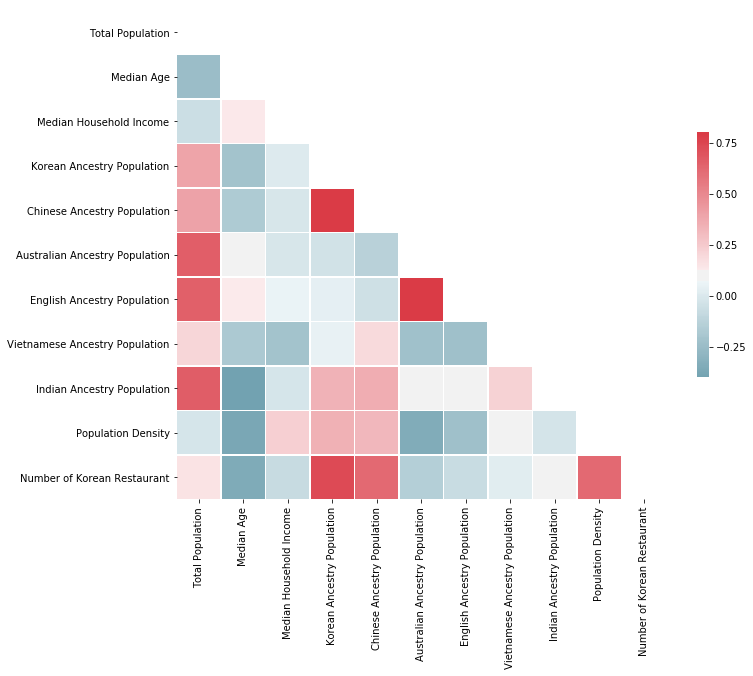

In [26]:
corr = melb_korean_rest_merged.drop(['latitude','longitude'],axis=1).corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-0.4, vmax=0.8, center=0.1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The correlation heatmap tells us intuitive correlation between data sets while the correlation matrix tells us the exact number of the coefficient.

I can see some interesting correlations through these figures.
1.	Korean ancestry population and the number of Korean restaurants have a strong correlation. This means my initial guess was correct.
2.	Chinese ancestry population and the number of Korean restaurants have a strong correlation too. Chinese people might like Korean food too. In fact, Korean TV drama is very popular in China.
3.	The other ancestry population such as Australian, English, Vietnamese and Indian do not have a correlation with the number of Korean restaurants.
4.	Korean ancestry population and Chinese ancestry population have a strong correlation. Maybe Chinese and Korean people tend to live in the similar area.
5.	Median age and the number of Korean restaurants have a moderate negative correlation. It hints younger generation prefer Korean food more.
6.	Population density and the number of Korean restaurants have correlation. This simply means there are more restaurants where there are more people.
7.	English ancestry population and Australian ancestry population have a strong correlation. This has nothing to do with Korean restaurants, but I can confirm they have been living in the same area. 


## 4. Results

Now we can look at the correlation between Korean ancestry population and the number of Korean restaurants closely. To be able to identify those suburbs with more Korean people but less Korean restaurants, I chose to use the scatter plot. 

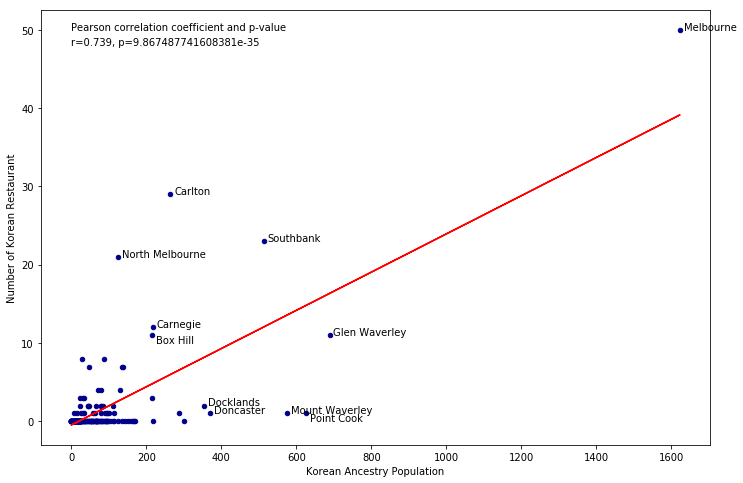

In [27]:
# Calculate Pearson correlation coefficient
x = melb_korean_rest_merged['Korean Ancestry Population']
y = melb_korean_rest_merged['Number of Korean Restaurant']
fit = np.polyfit(x, y, deg=1)
r,p = stats.pearsonr(x, y)

# plotting scatter plot
ax = melb_korean_rest_merged.plot(kind='scatter',x='Korean Ancestry Population',y='Number of Korean Restaurant',
                                  figsize=(12,8),color='darkblue')
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.annotate('Pearson correlation coefficient and p-value',xy=(0,50))
ax.annotate('r={0:.3f}, p={1}'.format(r, p), xy=(0, 48))

# Plotting suburb name
params = zip(melb_korean_rest_merged['Korean Ancestry Population'],
             melb_korean_rest_merged['Number of Korean Restaurant'],
             melb_korean_rest_merged['Suburb Name'])
for k_pop, k_rest,name in params:
    # Only plot where we are interested.
    if(k_rest > 10 or k_pop > 300):
        if(name == 'Point Cook' or name == 'Box Hill'): k_rest = k_rest -1 # Text location adjustment
        ax.text(k_pop+10, k_rest, name)

The blue dots indicate suburbs, and the red line is the regression line. A Pearson correlation coefficient and the p-value are calculated. The p-value is extremely small; therefore, I can confirm this correlation is genuine. 
To determine where to open a new Korean restaurant, I can use the regression line. Any suburbs below the red line indicate more Korean people but less Korean restaurants. Therefore, the following suburbs are good places to open a new Korean restaurant.
- Point Cook
- Mount Waverley
- Glen Wavery
- Docklands
- Doncaster

On the other hand, the following suburbs are not good places to open a new Korean Restaurant.
- Melbourne
- Carlton
- South Bank
- North Melbourne
- Carnegie
- Box Hill


## 5. Discussion

I found the suburbs which could be a good place to open a new Korean restaurant in the previous section. 

In this section, I will discuss some observations I made during the data wrangling/processing and some future improvements.

1. Limitations in Foursquare API search 
I can get only up to 50 results by Foursquare API search. This resulted capping the number of restaurants at 50 in each suburb. Luckily, it only happened to one suburb, Melbourne. Therefore, the numbers in Melbourne could be much higher. It seems there is no way to increase this number in Foursquare API, and if I want to get more than 50, I must use multiple latitudes/longitudes in each suburb. 

2. The category of Korean restaurant 
There are many different categories in Korean cuisine such as Korean traditional cuisine, Korean fried chicken, and Korean barbecue. I was not able to get this much details of restaurant category through Foursquare API. When opening a restaurant, it is probably ok to have other categories of Korean restaurant nearby but not the same category of Korean restaurant. If I can get more specific information of the category, the analysis can be improved further. 

3. Suburb size and searching radius
I noticed that there were big suburbs and small suburbs during data processing. I used the radius size of 1000m when I searched Korean restaurants through Foursquare API. This method is not fair to all suburbs because I cannot find all the restaurants, particularly in a big suburb. Ideally, this searching method needs to be improved by performing multiple latitudes/longitudes search depending on the size of suburbs. The radius size needs to be optimised too. 

4. Census Data 
The last census was conducted in 2016 which is 4 years ago. Therefore, the data is slightly outdated and might not be accurate enough. Possibly, there might be better suburbs now. The next census will be conducted in 2021 which is next year. It would be interesting to see the 2021 census data when the data is available.



## 6. Conclusion

In this research, I investigated where to open a new Korean restaurant in Melbourne. I used the 2016 census data and Foursquare API to find a suburb where a lot of Korean people live but not many Korean restaurants in the suburb. I found a couple of suburbs which could be good places to open a Korean restaurant, which is Point Cook, Mount Waverley, Glen Wavery etc. In the future, this research can be further improved by refining the searching method and using the 2021 census data.

## 7. Appendix

### Let's look at some of general statistics

#### Top and bottom 20 Household income suburbs

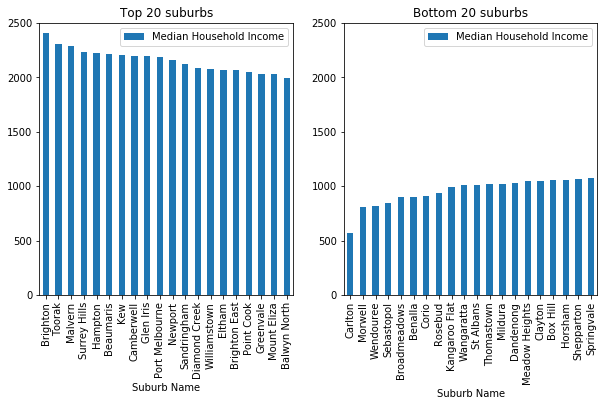

In [28]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_ylim(0,2500)
ax2.set_ylim(0,2500)
ax1.set_title('Top 20 suburbs')
ax2.set_title('Bottom 20 suburbs')
census_data_merged.sort_values(('Median Household Income'),ascending=False)[:20].plot(ax=ax1, kind='bar',x='Suburb Name',y='Median Household Income')
census_data_merged.sort_values(('Median Household Income'),ascending=True)[:20].plot(ax=ax2, kind='bar',x='Suburb Name',y='Median Household Income')

#### Top and bottom 20 Median Age suburbs

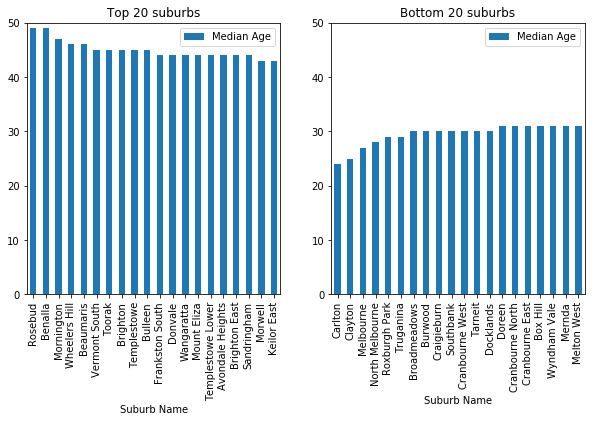

In [29]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_ylim(0,50)
ax2.set_ylim(0,50)
ax1.set_title('Top 20 suburbs')
ax2.set_title('Bottom 20 suburbs')
census_data_merged.sort_values(('Median Age'),ascending=False)[:20].plot(ax=ax1, kind='bar',x='Suburb Name',y='Median Age')
census_data_merged.sort_values(('Median Age'),ascending=True)[:20].plot(ax=ax2, kind='bar',x='Suburb Name',y='Median Age')

#### Top and bottom 20 Korean Ancestry Population/Chinese Ancestry Population suburbs

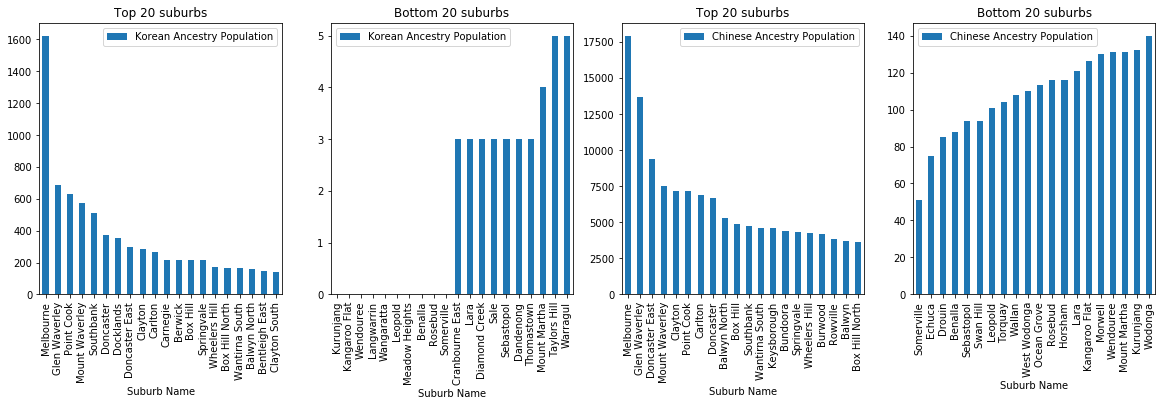

In [30]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
# ax1.set_ylim(0,50)
# ax2.set_ylim(0,50)
ax1.set_title('Top 20 suburbs')
ax2.set_title('Bottom 20 suburbs')
ax3.set_title('Top 20 suburbs')
ax4.set_title('Bottom 20 suburbs')
census_data_merged.sort_values(('Korean Ancestry Population'),ascending=False)[:20].plot(ax=ax1, kind='bar',x='Suburb Name',y='Korean Ancestry Population')
census_data_merged.sort_values(('Korean Ancestry Population'),ascending=True)[:20].plot(ax=ax2, kind='bar',x='Suburb Name',y='Korean Ancestry Population')
census_data_merged.sort_values(('Chinese Ancestry Population'),ascending=False)[:20].plot(ax=ax3, kind='bar',x='Suburb Name',y='Chinese Ancestry Population')
census_data_merged.sort_values(('Chinese Ancestry Population'),ascending=True)[:20].plot(ax=ax4, kind='bar',x='Suburb Name',y='Chinese Ancestry Population')